In [1]:
import warnings
warnings.filterwarnings('ignore')
import mlutils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
reload(mlutils)
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, DBSCAN
%matplotlib inline

/Volumes/sdcard/opt/conda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# See [Cluster Analysis on Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis) for a general reference

## Centroid based methods -  KMeans

observe 2D KMeans clustering with different numbers of clusters

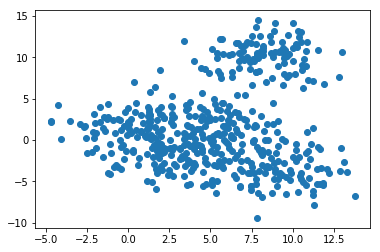

In [2]:
X = pd.read_csv("data/cluster1.csv").values
plt.scatter(X[:,0], X[:,1])

100% (8 of 8) |###########################| Elapsed Time: 0:00:02 Time: 0:00:02


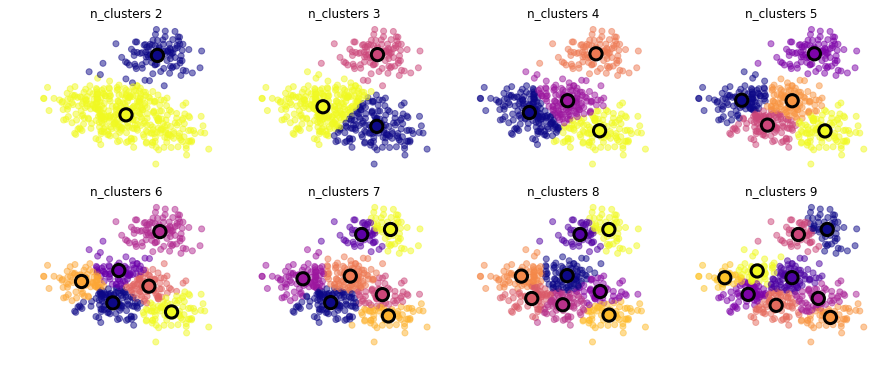

In [3]:
X = pd.read_csv("data/cluster1.csv").values
reload(mlutils)
mlutils.experiment_number_of_clusters(X, KMeans(), show_metric=False)

observe how clusters evolve through iterations as KMeans converges to a stable configuration

100% (10 of 10) |#########################| Elapsed Time: 0:00:00 Time: 0:00:00


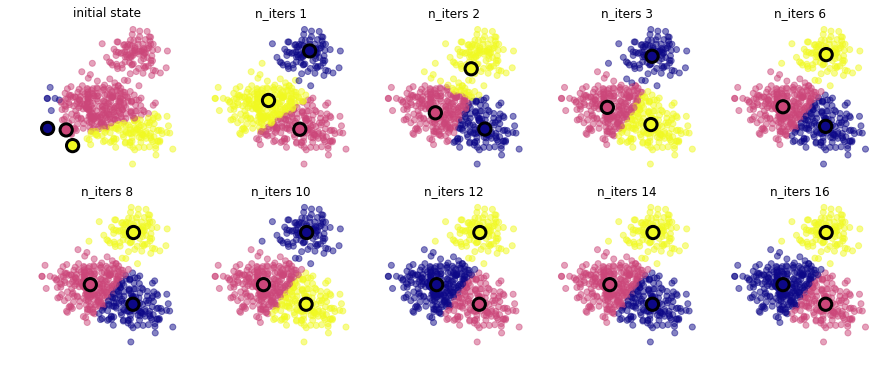

In [4]:
reload(mlutils)
mlutils.experiment_KMeans_number_of_iterations(X)

### experiment with different generated datasets

- change `cluster_std` and `centers` parameters in `make_blobs` to generate datasets of different distributions
- what is the _natural_ number of clusters you would use? why is this _natural_?

100% (8 of 8) |###########################| Elapsed Time: 0:00:01 Time: 0:00:01
100% (10 of 10) |#########################| Elapsed Time: 0:00:00 Time: 0:00:00


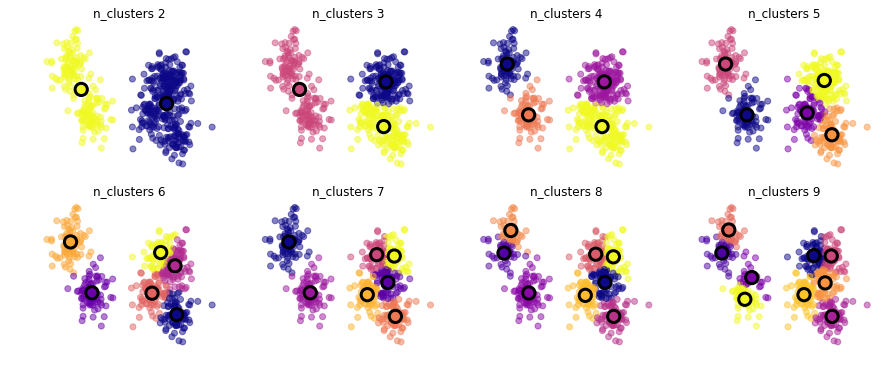

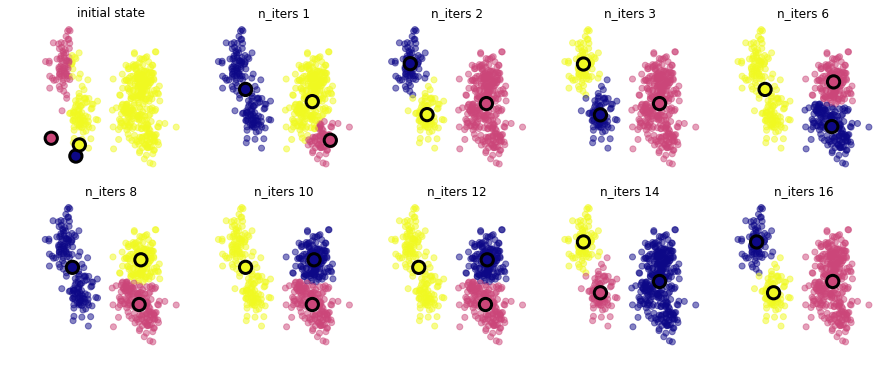

In [5]:
X,_ = make_blobs(500, cluster_std=1.5, centers=6)
mlutils.experiment_number_of_clusters(X, KMeans(), show_metric=False)
mlutils.experiment_KMeans_number_of_iterations(X)

### How to select the number of clusters? See <a href="https://en.wikipedia.org/wiki/Silhouette_(clustering)">Silhouette Coefficient</a>

100% (8 of 8) |###########################| Elapsed Time: 0:00:02 Time: 0:00:02


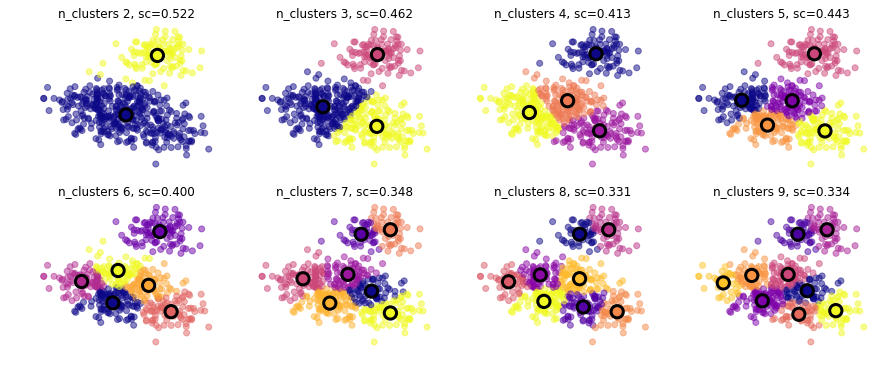

In [6]:
X = pd.read_csv("data/cluster1.csv").values
mlutils.experiment_number_of_clusters(X, KMeans(), show_metric=True)


are the clusters in the following example **_natural_**?

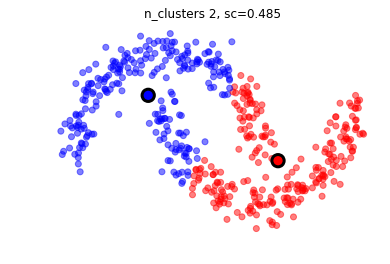

In [7]:
X,_ = make_moons(500, noise=.1)
mlutils.plot_cluster_predictions(KMeans(), X, n_clusters=2,cmap=plt.cm.bwr, show_metric=True)

## Density methods - DBSCAN

must specify $\epsilon$ (max neighborhood radius) and `min_samples`.

is the silhouette metric ok? what metric would you use?

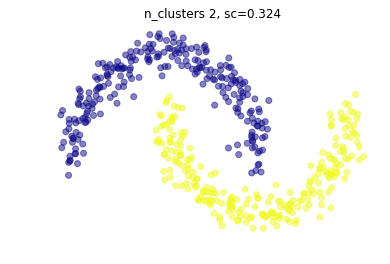

In [8]:
reload(mlutils)
X,_ = make_moons(500, noise=.1)
dbs = DBSCAN(eps=.15, min_samples=4, metric='euclidean')
mlutils.plot_cluster_predictions(dbs, X, cmap=plt.cm.plasma, show_metric=True)

very sensible to $\epsilon$. observe as well that silouhette score is also very sensible to outliers.

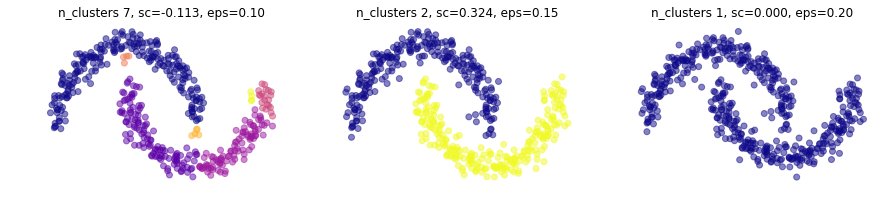

In [9]:
reload(mlutils)
plt.figure(figsize=(15,3))
for i,eps in enumerate([.1,.15,.2]):
    plt.subplot(1,3,i+1)
    mlutils.plot_cluster_predictions(DBSCAN(eps=eps, min_samples=4, metric='euclidean'), X, 
                                     cmap=plt.cm.plasma, show_metric=True, title_str=", eps=%.2f"%eps)


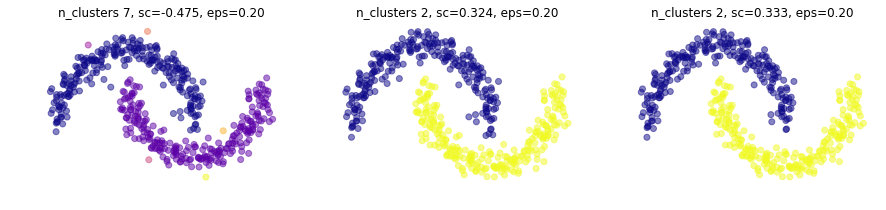

In [10]:
plt.figure(figsize=(15,3))
for i,min_samples in enumerate([1,4,10]):
    plt.subplot(1,3,i+1)
    mlutils.plot_cluster_predictions(DBSCAN(eps=.15, min_samples=min_samples, metric='euclidean'), X, 
                                     cmap=plt.cm.plasma, show_metric=True, title_str=", eps=%.2f"%eps)


## Connectivity methods - Agglomerative Clustering (Hierarchical)

check the parametres in [sklearn doc](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)  to specify some characterization of the underlying data structure.

observe how we can build k-neighbours connectivity matrix around any point.

In [11]:
X,_ = make_moons(500, noise=.1)

(-0.7962927882789438, 1.4077751470445836)

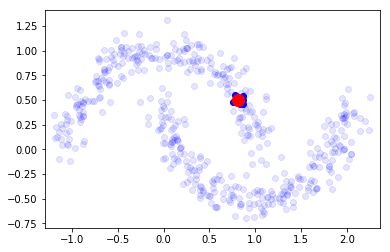

In [15]:
from sklearn.neighbors import kneighbors_graph
i = np.random.randint(len(X))
knn_graph = kneighbors_graph(X, 10, include_self=False)

nn = X[knn_graph[i].toarray()[0].astype(bool)]
plt.scatter(nn[:,0], nn[:,1], color="blue", alpha=1)
plt.scatter(X[:,0], X[:,1], color="blue", alpha=.1)
plt.scatter(X[i,0], X[i,1], s=150, color="red")
plt.xlim(np.min(X[:,0])-.1, np.max(X[:,0])+.1)
plt.ylim(np.min(X[:,1])-.1, np.max(X[:,1])+.1)

we use this connectivity matrix to provide structure info to the algorithm

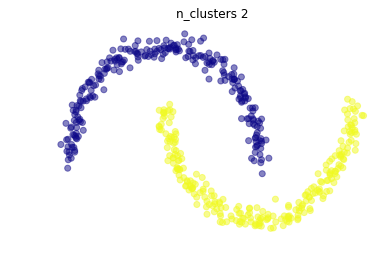

In [16]:
from sklearn.neighbors import kneighbors_graph
X,_ = make_moons(500, noise=.05)
knn_graph = kneighbors_graph(X, 20, include_self=False)
ac = AgglomerativeClustering(connectivity=knn_graph, linkage="average")

mlutils.plot_cluster_predictions(ac, X, n_clusters=2, cmap=plt.cm.plasma)

observe the response to different neighborhood sizes.

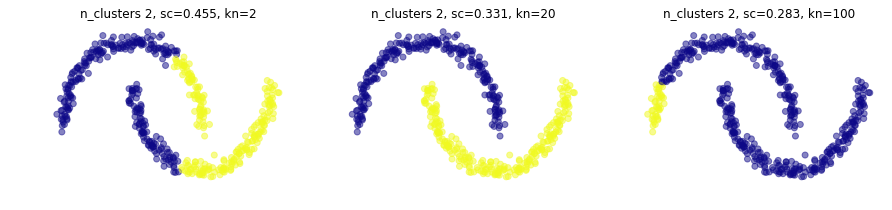

In [17]:
plt.figure(figsize=(15,3))
for i,kn in enumerate([2,20,100]):
    plt.subplot(1,3,i+1)
    knn_graph = kneighbors_graph(X, kn, include_self=False)
    mlutils.plot_cluster_predictions(AgglomerativeClustering(connectivity=knn_graph, linkage="average"), X, 
                                     n_clusters=2, 
                                     cmap=plt.cm.plasma, show_metric=True, title_str=", kn=%d"%kn)

and to different noise levels in the dataset

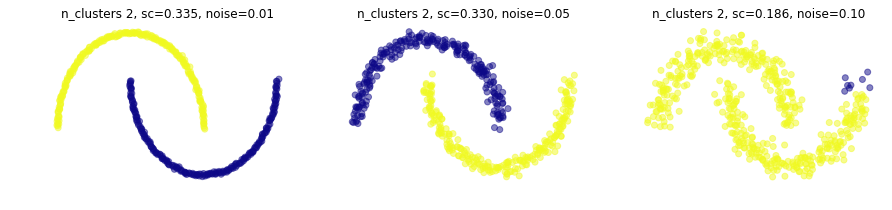

In [18]:
plt.figure(figsize=(15,3))
for i,noise in enumerate([.01,.05,.1]):
    plt.subplot(1,3,i+1)
    X,_ = make_moons(500, noise=noise)
    knn_graph = kneighbors_graph(X, 20, include_self=False)
    mlutils.plot_cluster_predictions(AgglomerativeClustering(connectivity=knn_graph, linkage="average"), X, 
                                     n_clusters=2, 
                                     cmap=plt.cm.plasma, show_metric=True, title_str=", noise=%.2f"%noise)

# Experiment

observe clustering result with different synthetic datasets and algorithms.

- See [dataset generation](http://scikit-learn.org/stable/modules/classes.html#samples-generator) in sklearn.
- See [comparing clustering](http://scikit-learn.org/0.18/auto_examples/cluster/plot_cluster_comparison.html) on toy datasets.

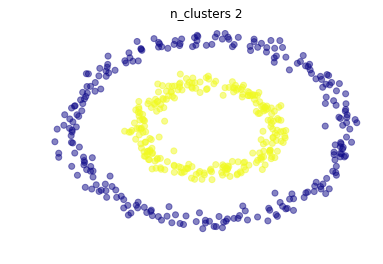

In [19]:
from sklearn import datasets
X,_ = datasets.make_circles(500, noise=.05, factor=.5)
knn_graph = kneighbors_graph(X, 10, include_self=False)
ac = AgglomerativeClustering(connectivity=knn_graph, linkage="average")
mlutils.plot_cluster_predictions(ac, X, n_clusters=2, cmap=plt.cm.plasma)

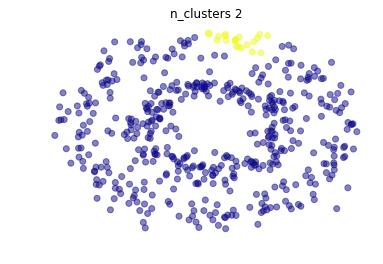

In [20]:
from sklearn import datasets
X,_ = datasets.make_circles(500, noise=.1, factor=.5)
knn_graph = kneighbors_graph(X, 50, include_self=False)
ac = AgglomerativeClustering(connectivity=knn_graph, linkage="average")
mlutils.plot_cluster_predictions(ac, X, n_clusters=2, cmap=plt.cm.plasma)